# Unsupervised learning. K-Means algorithm.

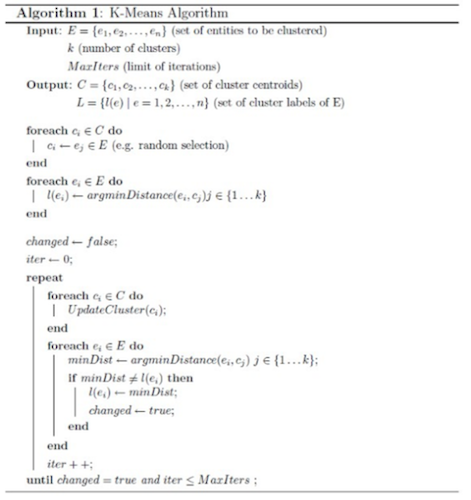

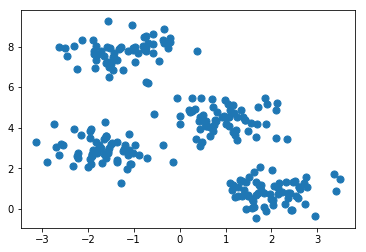

In [3]:
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import numpy as np

from sklearn.datasets.samples_generator import make_blobs
points, true_label = make_blobs(n_samples=250, centers=4,
                       cluster_std=0.60, random_state=0)
plt.scatter(points[:, 0], points[:, 1], s=50);

In [4]:
print(points[0,:])

[-1.3550978   3.28318856]


## Find clusters using [kMeans()](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html)

In [5]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4, init='random', random_state=1)
kmeans.fit(points)

KMeans(algorithm='auto', copy_x=True, init='random', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=1, tol=0.0001, verbose=0)

In [6]:
clusters_id = kmeans.predict(points)
print(clusters_id)

[3 2 0 3 2 0 1 2 1 0 1 3 1 3 3 1 3 1 1 1 1 1 0 2 3 1 2 3 3 1 3 2 0 1 0 3 1
 1 1 2 0 1 1 3 3 3 1 1 1 2 3 2 3 0 3 0 1 1 1 3 2 0 2 0 1 0 0 0 1 1 0 3 3 3
 1 0 0 2 3 2 0 1 1 0 1 3 2 2 2 1 2 0 1 2 3 0 0 0 3 2 0 1 2 2 1 3 3 1 1 3 2
 3 0 2 1 0 3 2 3 1 1 2 2 0 0 1 3 3 2 1 0 0 0 1 2 3 3 0 1 0 2 0 3 0 1 3 1 3
 1 3 3 2 3 2 2 3 0 0 2 2 1 3 0 3 2 0 2 3 3 0 0 1 3 3 2 0 1 2 2 2 2 1 3 3 2
 0 2 2 0 2 0 0 0 2 1 2 2 3 0 2 2 2 0 3 1 0 0 3 3 0 1 2 0 3 1 3 0 3 0 1 2 3
 1 1 1 0 0 1 1 0 2 1 2 2 0 3 0 2 1 2 0 2 0 3 2 2 2 0 3 3]


In [83]:
print(points[clusters_id == 3])

[[-1.3550978   3.28318856]
 [-1.17979111  3.12767494]
 [-1.55220688  2.74574995]
 [-2.24021957  2.61379245]
 [-1.8146975   3.29009724]
 [-1.11301311  3.69899   ]
 [-2.22131717  2.73050691]
 [-1.71343572  2.97632236]
 [-1.79145759  2.74966896]
 [-1.23065895  2.8482199 ]
 [-0.35335663  3.15193825]
 [-1.7578319   2.97449321]
 [-1.74572014  3.01190457]
 [-1.10782972  2.92014479]
 [-2.88024255  2.30437816]
 [-2.2029995   2.47947561]
 [-1.60847383  3.60001708]
 [-1.14091533  1.97550822]
 [-1.11064012  2.8221382 ]
 [-1.94213392  3.83970849]
 [-2.3274591   2.10985176]
 [-1.88469244  2.88634188]
 [-2.6886719   3.03114942]
 [-1.35863899  2.32200809]
 [-0.88579837  2.64585078]
 [-0.14455399  2.28187277]
 [-1.62150422  4.27191636]
 [-1.95866665  2.43008647]
 [-1.94972418  3.4838387 ]
 [-1.07859101  2.20451529]
 [-1.02192525  2.76820711]
 [-1.12707416  2.64145039]
 [-1.93960658  2.18943582]
 [-2.58043836  3.18844294]
 [-1.90375655  2.62926599]
 [-1.06295223  2.20755388]
 [-0.7081849   2.50421275]
 

In [7]:
centroids = kmeans.cluster_centers_
for centroid in centroids:
    print(centroid)

[2.01112575 0.83157962]
[0.950569   4.42966652]
[-1.21446887  7.75523646]
[-1.67766192  2.9059133 ]


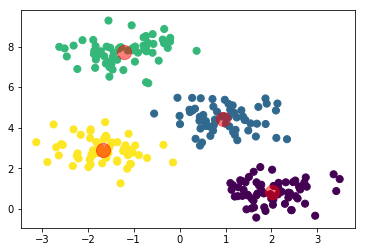

In [8]:
plt.scatter(points[:, 0], points[:, 1], c=clusters_id, s=50, cmap='viridis')
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=200, alpha=0.5)

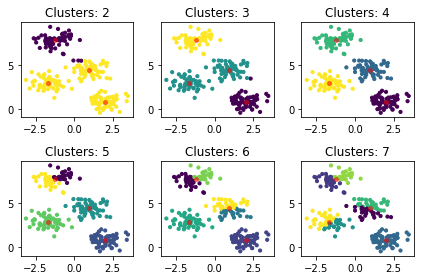

In [9]:
for k in [2,3,4,5,6,7]:
    kmeans_ = KMeans(n_clusters=k, init='random', random_state=1)
    kmeans_.fit(points)
    clusters_id_ = kmeans_.predict(points)
    plt.subplot("23"+str(k-1))
    plt.scatter(points[:, 0], points[:, 1], c=clusters_id_ , s=10, cmap='viridis')

    centroids_ = kmeans_.cluster_centers_
    plt.scatter(centroids_[:, 0], centroids_[:, 1], c='red', s=15, alpha=0.5)
    plt.title("Clusters: "+str(k))
plt.tight_layout()

kMeans tends to stuck in local minima

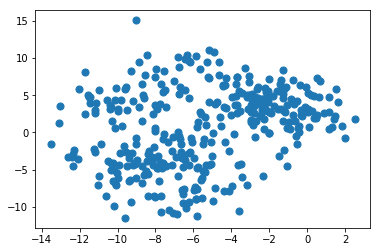

In [10]:
points__, true_label__ = make_blobs(n_samples=350, centers=8, cluster_std=1.9, random_state=1)
plt.scatter(points__[:, 0], points__[:, 1], s=50);

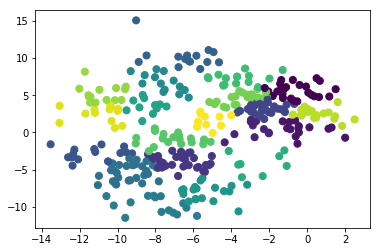

In [11]:
kmeans___ = KMeans(n_clusters=20, init='random')
kmeans___.fit(points__)
clusters_id___ = kmeans___.predict(points__)
plt.scatter(points__[:, 0], points__[:, 1], c=clusters_id___ , s=50, cmap='viridis')

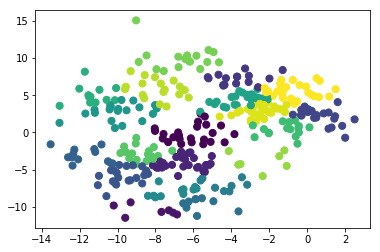

In [12]:
_kmeans___ = KMeans(n_clusters=20, init='random')
_kmeans___.fit(points__)
_clusters_id___ = _kmeans___.predict(points__)
plt.scatter(points__[:, 0], points__[:, 1], c=_clusters_id___ , s=50, cmap='viridis')

## [Clustering evaluation](https://scikit-learn.org/stable/modules/clustering.html#clustering-evaluation)

In [13]:
kmeans_ = KMeans(n_clusters=6, init='random',)
kmeans_.fit(points)
clusters_id_ = kmeans_.predict(points)

- adjusted rand score

In [14]:
from sklearn import metrics
print(metrics.adjusted_rand_score(true_label,  clusters_id_))

0.8172289728180736


- homogeneity score

In [15]:
print(metrics.homogeneity_score(true_label, clusters_id_))

0.9999999999999999


- Silhouette Coefficient

In [16]:
from sklearn.metrics import pairwise_distances
print(metrics.silhouette_score(points, clusters_id_, metric='euclidean'))

0.5103859108017643


In [17]:
from sklearn.metrics import davies_bouldin_score
print(metrics.davies_bouldin_score(points, clusters_id_))

0.8620667708278137


In [18]:
rand_scores_= []
homogeneity_score_ = []
silhouette_score_ = []
db_index=[]

clusters_number=[2,3,4,5,6,7,8,9,10,11]

for k in clusters_number:
    kmeans_ = KMeans(n_clusters=k, init='random',random_state=1)
    kmeans_.fit(points)
    clusters_id_ = kmeans_.predict(points)
    rand_scores_.append(metrics.adjusted_rand_score(true_label, clusters_id_))
    homogeneity_score_.append(metrics.homogeneity_score(true_label, clusters_id_))
    silhouette_score_.append(metrics.silhouette_score(points, clusters_id_, metric='euclidean'))
    db_index.append(metrics.davies_bouldin_score(points, clusters_id_))


Text(0, 0.5, 'Rand score')

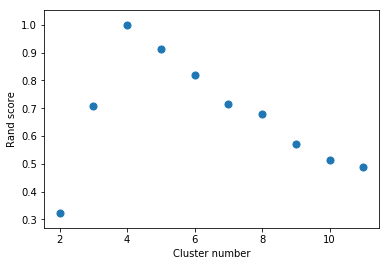

In [19]:
plt.scatter(clusters_number, rand_scores_, s=50)
plt.xlabel('Cluster number')
plt.ylabel('Rand score')

Text(0, 0.5, 'Homogeneity score')

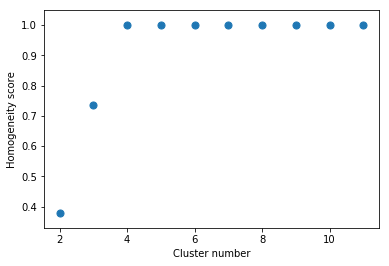

In [20]:
plt.scatter(clusters_number, homogeneity_score_, s=50)
plt.xlabel('Cluster number')
plt.ylabel('Homogeneity score')

Text(0, 0.5, 'Silhouette score')

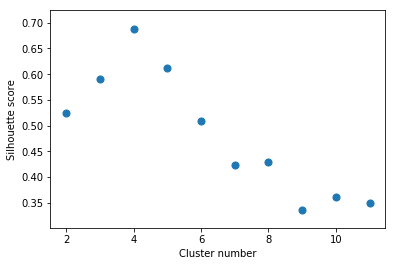

In [21]:
plt.scatter(clusters_number, silhouette_score_, s=50)
plt.xlabel('Cluster number')
plt.ylabel('Silhouette score')

Text(0, 0.5, 'Davies-Bouldin Index')

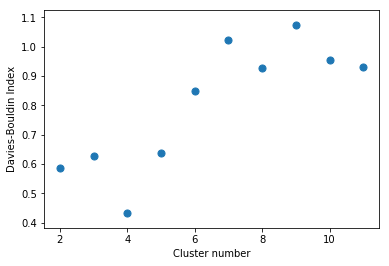

In [22]:
plt.scatter(clusters_number, db_index, s=50)
plt.xlabel('Cluster number')
plt.ylabel('Davies-Bouldin Index')

## Unsupervised learning with nonlinear data

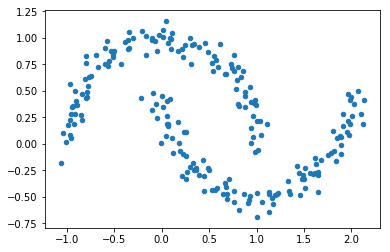

In [23]:
from sklearn.datasets import make_moons
nonlineary_points, y = make_moons(220, noise=0.07, random_state=0)
plt.scatter(nonlineary_points[:, 0], nonlineary_points[:, 1], s=20)

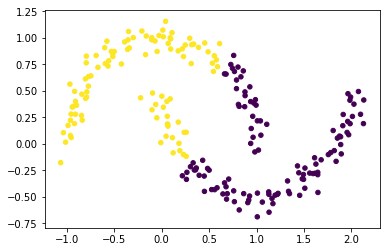

In [24]:
clusters__ = KMeans(2, random_state=0).fit_predict(nonlineary_points)
plt.scatter(nonlineary_points[:, 0], nonlineary_points[:, 1], c=clusters__, s=20, cmap='viridis');

## [DBSCAN()](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html)

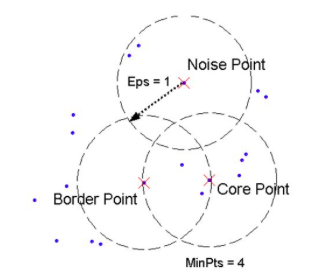

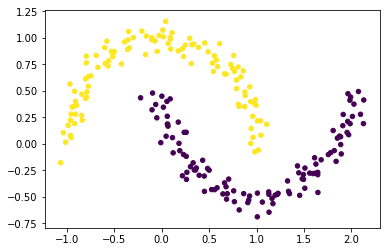

In [89]:
from sklearn.cluster import DBSCAN
db = DBSCAN(eps=0.3694, min_samples=10, metric="euclidean").fit(nonlineary_points)
plt.scatter(nonlineary_points[:, 0], nonlineary_points[:, 1], c=db.labels_, s=20, cmap='viridis');

## [AgglomerativeClustering()](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html#sklearn.cluster.AgglomerativeClustering)

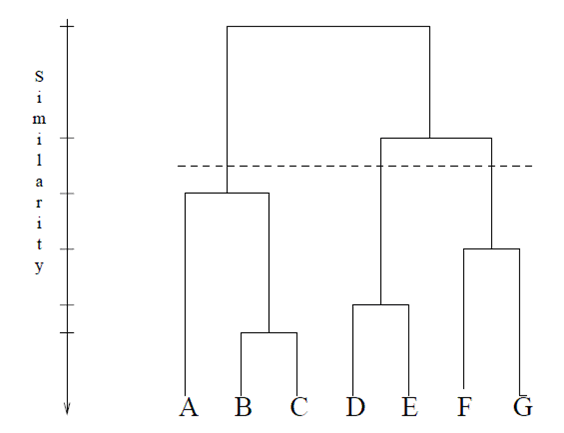

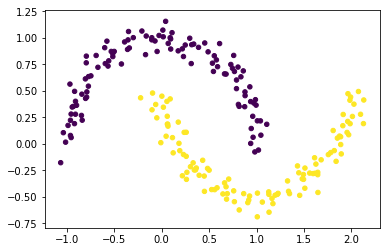

In [36]:
from sklearn.cluster import AgglomerativeClustering
agglomerative = AgglomerativeClustering(linkage="single", affinity="euclidean").fit(nonlineary_points)
plt.scatter(nonlineary_points[:, 0], nonlineary_points[:, 1], c=agglomerative.labels_, s=20, cmap='viridis');

## [Spectral Clustering](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.SpectralClustering.html)

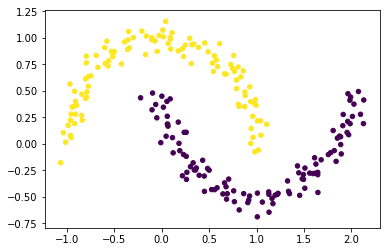

In [27]:
from sklearn.cluster import SpectralClustering
model = SpectralClustering(n_clusters=2, affinity='nearest_neighbors',
                           assign_labels='kmeans')
clusters__ = model.fit_predict(nonlineary_points)
plt.scatter(nonlineary_points[:, 0], nonlineary_points[:, 1], c=clusters__, s=20, cmap='viridis');

## Student task

- Using kMeans algorithm find clusters in the Iris dataset. What is the "optimal" number of clusters? Plot how cluster index value change when cluster number changes.

In [80]:
from sklearn import datasets
iris = datasets.load_iris()
data = iris.data

print("data shape: ", data.shape)
print("sample datapoint: ", data[0,:])

data shape:  (150, 4)
sample datapoint:  [5.1 3.5 1.4 0.2]


In [81]:
# ...

- Using kMeans, DBSCAN and Agglomerative Clustering find cluster containing similiar faces in Olivetti faces dataset. Evaluate each solution using Calinski-Harabaz, Davies-Bouldin  clustering index. For kMeans plot centroids. 

In [28]:
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_olivetti_faces
dataset = fetch_olivetti_faces()

data = dataset.data
targets = dataset.target

In [29]:
print(data.shape)
print(data[0,:])

(400, 4096)
[0.30991736 0.3677686  0.41735536 ... 0.15289256 0.16115703 0.1570248 ]


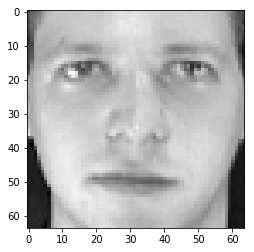

In [30]:
plt.imshow(data[0,:].reshape(64,64), cmap=plt.cm.gray, interpolation="nearest")
plt.grid(False)

In [ ]:
# ....